In [1]:
## Networks Project Gender wise Communities

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import optimize
import statsmodels.formula.api as smf
import community as cmnt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
juneDf = pd.read_csv('june14-citibike-tripdata.csv')
stationsDf = pd.read_csv('citibike-locations.csv')

In [4]:
print juneDf.info()
print juneDf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936880 entries, 0 to 936879
Data columns (total 15 columns):
tripduration               936880 non-null int64
starttime                  936880 non-null object
stoptime                   936880 non-null object
start station id           936880 non-null int64
start station name         936880 non-null object
start station latitude     936880 non-null float64
start station longitude    936880 non-null float64
end station id             936880 non-null int64
end station name           936880 non-null object
end station latitude       936880 non-null float64
end station longitude      936880 non-null float64
bikeid                     936880 non-null int64
usertype                   936880 non-null object
birth year                 818648 non-null float64
gender                     936880 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 114.4+ MB
None
   tripduration      starttime       stoptime  start station id  \
0  

In [5]:
juneMale = juneDf[juneDf.gender == 1]

In [6]:
juneMale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620949 entries, 0 to 936879
Data columns (total 15 columns):
tripduration               620949 non-null int64
starttime                  620949 non-null object
stoptime                   620949 non-null object
start station id           620949 non-null int64
start station name         620949 non-null object
start station latitude     620949 non-null float64
start station longitude    620949 non-null float64
end station id             620949 non-null int64
end station name           620949 non-null object
end station latitude       620949 non-null float64
end station longitude      620949 non-null float64
bikeid                     620949 non-null int64
usertype                   620949 non-null object
birth year                 620906 non-null float64
gender                     620949 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 75.8+ MB


In [7]:
juneFemale = juneDf[juneDf.gender == 2]

In [8]:
juneFemale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197579 entries, 10 to 936876
Data columns (total 15 columns):
tripduration               197579 non-null int64
starttime                  197579 non-null object
stoptime                   197579 non-null object
start station id           197579 non-null int64
start station name         197579 non-null object
start station latitude     197579 non-null float64
start station longitude    197579 non-null float64
end station id             197579 non-null int64
end station name           197579 non-null object
end station latitude       197579 non-null float64
end station longitude      197579 non-null float64
bikeid                     197579 non-null int64
usertype                   197579 non-null object
birth year                 197579 non-null float64
gender                     197579 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 24.1+ MB


In [9]:
# Counting rides between each pair of the stations
male_grouped = juneMale.groupby(['start station id', 'end station id']).count()
female_grouped = juneFemale.groupby(['start station id', 'end station id']).count()

In [10]:
# Resetting the indeces
male_grouped = male_grouped.reset_index()
female_grouped = female_grouped.reset_index()

In [11]:
# Selecting 3 columns, representing node A, node B and weight of the edges
male_grouped = male_grouped[['start station id', 'end station id', 'tripduration']]
female_grouped = female_grouped[['start station id', 'end station id', 'tripduration']]
male_grouped.columns = ['start', 'stop', 'weight']
female_grouped.columns = ['start', 'stop', 'weight']

In [12]:
# Taking a look at the resulting dataframes
print male_grouped.head()
print female_grouped.head()

   start  stop  weight
0     72    72      45
1     72    79       7
2     72    82       2
3     72    83       1
4     72   116       2
   start  stop  weight
0     72    72      23
1     72    79       1
2     72   116       2
3     72   127       1
4     72   128       2


In [13]:
# Creating the graphs
maleGraph = nx.DiGraph()
femaleGraph = nx.DiGraph()

# Adding edges
for k in male_grouped.index:
    maleGraph.add_edge(male_grouped['start'][k], male_grouped['stop'][k], weight = 1.0*male_grouped['weight'][k]/21)
for k in female_grouped.index:
    femaleGraph.add_edge(female_grouped['start'][k], female_grouped['stop'][k], weight = 1.0 * female_grouped['weight'][k]/9)

In [14]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

In [15]:
# Pagerank for various alphas
#alpha = [0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
#for al in alpha:
print "Male"
topdict(nx.pagerank(maleGraph, 0.85), 10)
print "\n Female"
topdict(nx.pagerank(femaleGraph, 0.85), 10)
#print "\n"

Male
1|521:0.00947740502558
2|293:0.0090129874721
3|497:0.00885870535335
4|519:0.00859856247556
5|358:0.0076244309813
6|435:0.00746334304453
7|151:0.00662149492671
8|382:0.00660499258121
9|284:0.00652229190297
10|426:0.00650970413118

 Female
1|497:0.00975529704891
2|293:0.0092850863988
3|426:0.00922975615851
4|435:0.00859464225903
5|358:0.00841247692775
6|382:0.00830838437532
7|151:0.00795181559516
8|402:0.00731071511792
9|285:0.00718534535446
10|168:0.00695874349311


In [16]:
# Function that removes loops from the graph
def remove_loops(G):
    GU=G
    for n in GU.nodes():
        if GU.has_edge(n,n):
            GU.remove_edge(n,n)
    return GU  

In [17]:
# Function that creates undirected symmetrical graph
def directed_to_undirected(G):
    GU=nx.Graph()
    for e in G.edges(data=True):
        if GU.has_edge(e[0],e[1]):
            GU[e[0]][e[1]]['weight']=GU[e[0]][e[1]]['weight']+e[2]['weight']
        else:
            GU.add_edge(e[0],e[1],weight=e[2]['weight'])
    return GU   

In [18]:
maleGraph = remove_loops(maleGraph)
femaleGraph = remove_loops(femaleGraph)
maleGraph = directed_to_undirected(maleGraph)
femaleGraph = directed_to_undirected(femaleGraph)
male_communities = cmnt.best_partition(maleGraph)
female_communities = cmnt.best_partition(femaleGraph)

In [19]:
# Pageranks
male_pagerank = nx.pagerank(maleGraph, 0.85)
female_pagerank = nx.pagerank(femaleGraph, 0.85)

In [20]:
# Calculating locations of the stations
pos ={}
for c in stationsDf.index:
    pos[stationsDf.station_id[c]] = (stationsDf.lat[c], stationsDf.lon[c])

In [21]:
# Visualizing function
def visualizePartition(G, partition, pgrank, pos):
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G, pos=pos, with_labels=True, arrows=True, node_size=1.5E5*np.array(pgrank.values()), 
            node_color=c, width=0.5, edge_color='gray')

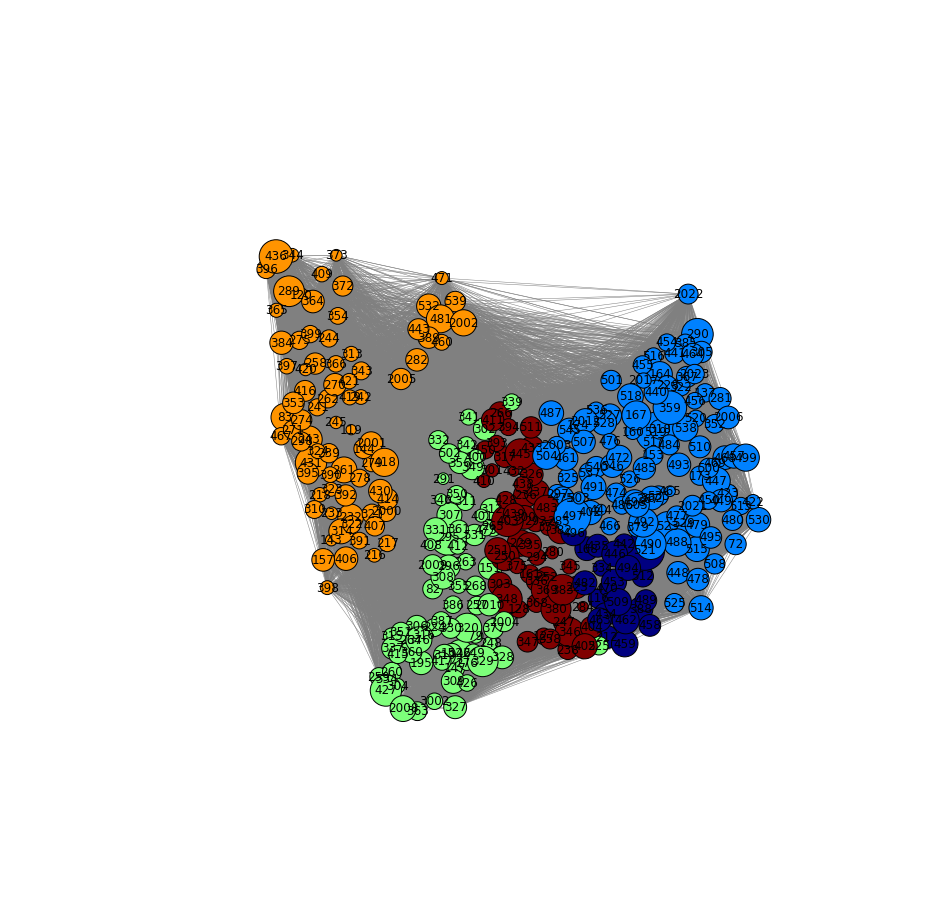

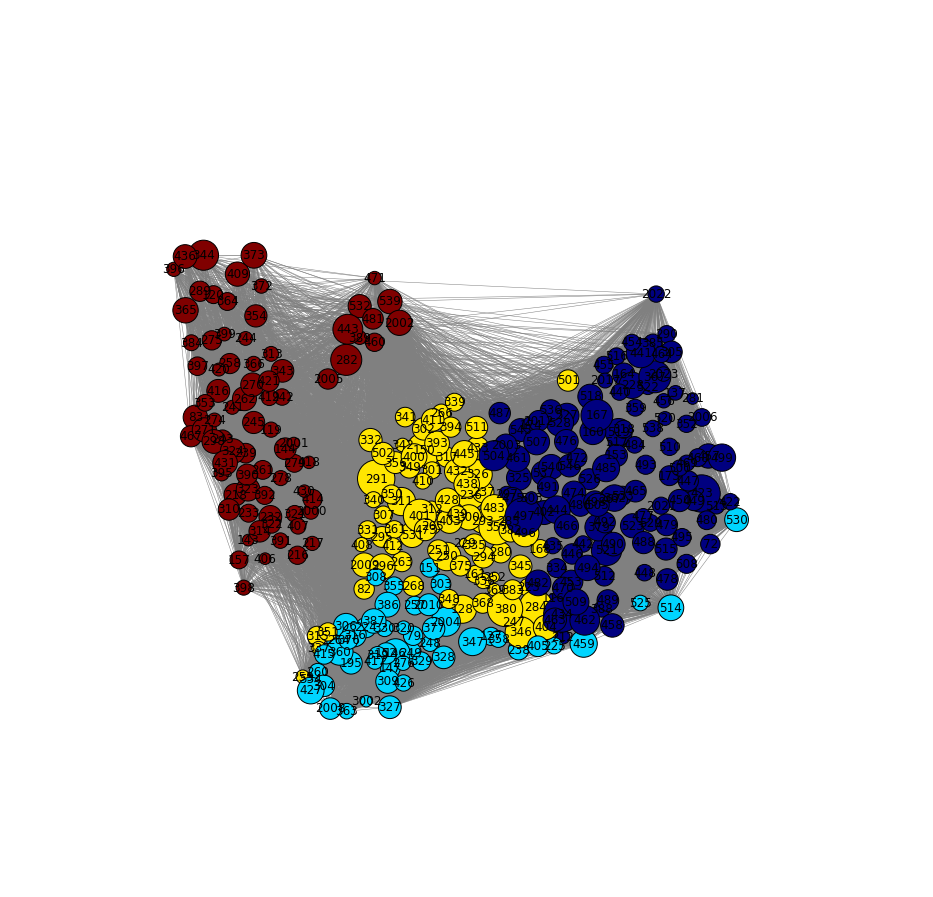

In [22]:
# Plotting the communities
random.seed(2015)
visualizePartition(maleGraph, male_communities, male_pagerank, pos)
random.seed(2015)
visualizePartition(femaleGraph, female_communities, female_pagerank, pos)

In [23]:
print male_communities

{72: 1, 79: 2, 82: 2, 83: 3, 116: 0, 119: 3, 120: 3, 127: 4, 128: 4, 137: 1, 143: 3, 144: 3, 146: 2, 147: 2, 150: 4, 151: 2, 152: 2, 153: 1, 157: 3, 160: 1, 161: 4, 164: 1, 167: 1, 168: 0, 173: 1, 174: 1, 195: 2, 212: 0, 216: 3, 217: 3, 218: 3, 223: 4, 224: 2, 225: 2, 228: 1, 229: 4, 232: 3, 233: 3, 236: 4, 237: 4, 238: 4, 239: 3, 241: 3, 242: 3, 243: 3, 244: 3, 245: 3, 247: 4, 248: 2, 249: 2, 250: 4, 251: 4, 252: 4, 257: 2, 258: 3, 259: 2, 260: 2, 261: 3, 262: 3, 263: 2, 264: 2, 265: 2, 266: 4, 267: 1, 268: 2, 270: 3, 271: 3, 274: 3, 275: 3, 276: 2, 278: 3, 279: 3, 280: 4, 281: 1, 282: 3, 284: 4, 285: 4, 289: 3, 290: 1, 291: 2, 293: 4, 294: 4, 295: 2, 296: 2, 297: 1, 298: 3, 300: 4, 301: 4, 302: 2, 303: 4, 304: 2, 305: 1, 306: 2, 307: 2, 308: 2, 309: 2, 310: 3, 311: 2, 312: 2, 313: 3, 314: 3, 315: 2, 316: 2, 317: 4, 318: 1, 319: 2, 320: 2, 321: 3, 322: 3, 323: 3, 324: 3, 325: 1, 326: 4, 327: 2, 328: 2, 329: 2, 330: 2, 331: 2, 332: 2, 334: 0, 335: 4, 336: 4, 337: 2, 339: 2, 340: 2, 341

In [24]:
# Splitting the graphs into communities for Males
group0 = []
group1 = []
group2 = []
group3 = []
for k in male_communities:
    if male_communities[k] == 0:
        group0.append(k)
    if male_communities[k] == 1:
        group1.append(k)
    if male_communities[k] == 2:
        group2.append(k)
    if male_communities[k] == 3:
        group3.append(k)

maleGraph0 = maleGraph.subgraph(group0)
maleGraph1 = maleGraph.subgraph(group1)
maleGraph2 = maleGraph.subgraph(group2)
maleGraph3 = maleGraph.subgraph(group3)

In [25]:
# Splitting the graphs into communities for Females
group0 = []
group1 = []
group2 = []
group3 = []
for k in female_communities:
    if female_communities[k] == 0:
        group0.append(k)
    elif female_communities[k] == 1:
        group1.append(k)
    elif female_communities[k] == 2:
        group2.append(k)
    elif female_communities[k] == 3:
        group3.append(k)

femaleGraph0 = femaleGraph.subgraph(group0)
femaleGraph1 = femaleGraph.subgraph(group1)
femaleGraph2 = femaleGraph.subgraph(group2)
femaleGraph3 = femaleGraph.subgraph(group3)

In [26]:
# Calculating pageranks for each community inside each community
print "Male community 0"
topdict(nx.pagerank(maleGraph0, 0.85), 10)
print "\n"
print "Female community 0"
topdict(nx.pagerank(femaleGraph0, 0.85), 10)
print "\n\n"
print "Male community 1"
topdict(nx.pagerank(maleGraph1, 0.85), 10)
print "\n"
print "Female community 1"
topdict(nx.pagerank(femaleGraph1, 0.85), 10)
print "\n\n"
print "Male community 2"
topdict(nx.pagerank(maleGraph2, 0.85), 10)
print "\n"
print "Female community 2"
topdict(nx.pagerank(femaleGraph2, 0.85), 10)
print "\n\n"
print "Male community 3"
topdict(nx.pagerank(maleGraph3, 0.85), 10)
print "\n"
print "Female community 3"
topdict(nx.pagerank(femaleGraph3, 0.85), 10)

Male community 0
1|521:0.0978601788958
2|435:0.0687750745771
3|116:0.0557489897522
4|462:0.0546976409004
5|509:0.0530729271225
6|446:0.0492676269485
7|459:0.0475626222541
8|453:0.0465426717987
9|494:0.0453225899587
10|463:0.0422431248404


Female community 0
1|435:0.0216536626241
2|497:0.0215936750099
3|521:0.0176608167341
4|402:0.017239725574
5|444:0.0155325217885
6|499:0.0155188109036
7|519:0.0150942953476
8|462:0.0140414917227
9|528:0.0135806743076
10|446:0.0129185713316



Male community 1
1|519:0.0297168553216
2|490:0.0202918726597
3|492:0.0201084832019
4|379:0.0179346925768
5|318:0.0176288145961
6|497:0.0161759125195
7|499:0.0154727824337
8|528:0.0150526198227
9|523:0.0145165778189
10|305:0.014149141796


Female community 1
1|426:0.0602740200338
2|147:0.0448569999121
3|3002:0.042761786314
4|327:0.0419439790559
5|363:0.0360482036009
6|358:0.0357653129435
7|347:0.0329309925379
8|151:0.0290638433805
9|514:0.0253980351478
10|329:0.0249934497856



Male community 2
1|327:0.03293448097